# Practica 1 - Manejo visualización Iris Setosa

- Fuerte Martinez Nestor Enrique
- Tamez Muñoz Maria Angel
- Vazquez Sanchez Erick Alejandro

## Ejercicio 1: Cargue los datos iris

Cargar los datos del iris en un data frame (pandas) e imprima la descripción de los datos (columnas y renglones), tipo y las 10 primeras filas de los datos. Fuente de datos: https://archive.ics.uci.edu/ml/datasets/Iris.

In [156]:
!pip3 install -U ucimlrepo 

In [157]:
# Siguiendo la documentacion, importamos la libreria ucimlrepo
# para tener acceso a las imagenes sin tener que descargarlas una a una
from ucimlrepo import fetch_ucirepo

In [158]:
# obtenemos las imagenes del dataset de iris, id = 53
iris = fetch_ucirepo(id=53)

x = iris.data.features
y = iris.data.targets

# juntamos los dos datasets
x['Especie'] = y

print(iris.metadata)
print(iris.variables)

{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'published_in': 'Significance, 2021', 'year': 2021, 'url': 'https://www.semanticscholar.org/paper/4599862ea877863669a6a8e63a3c707a787d5d7e', 'doi': '1740-9713.01589'}, 'add

In [159]:
# en x se guarda la informacion de los iris
# tamaño y ancho del sepalo y del petalo

# Imprimimos solo los primeros 10 valores encontrados
print(x[0:10])
print(type(x))

   sepal length  sepal width  petal length  petal width      Especie
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa
<class 'pandas.core.frame.DataFrame'>


## Ejercicio 2
Imprima las llaves y el número de filas y de columnas.

In [160]:
llaves = x.keys()
(rows, cols) = x.shape

print(f'Las llaves son: {llaves}', end='\n')
print(f'Numero de filas: {rows}')
print(f'Numero de columnas: {cols}')

Las llaves son: Index(['sepal length', 'sepal width', 'petal length', 'petal width',
       'Especie'],
      dtype='object')
Numero de filas: 150
Numero de columnas: 5


## Ejercicio 3
Obtenga el número de muestras faltantes o Nan.

In [161]:
print(x)

muestras_faltantes = x.isnull().sum(min_count=1)
muestras_faltantes = muestras_faltantes[muestras_faltantes != 0]

if muestras_faltantes.shape[0]:
    print('Recuento de valores nulos por columna: ')
    for name, miss_vals in muestras_faltantes.items():
        p = miss_vals > 1
        print(f"  - A la columna '{name}' le falta{'n' if p else ''} "
              f"{miss_vals} dato{'s' if p else ''}.")
else:
    print('No existen muestras faltantes')

     sepal length  sepal width  petal length  petal width         Especie
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]
No existen muestras faltantes


# Ejercicio 4
Cree un arreglo 2-D de tamaño 5x5 con unos en la diagonal y ceros en el resto. Convierta el arreglo NumPy
a una matriz dispersa de ScyPy en formato CRS. Nota: una matriz se considera dispersa cuando el
porcentaje de ceros es mayor a 0.5.

In [162]:
%pip install numpy
%pip install scipy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [163]:
import numpy as np
from scipy import sparse

# creamos la matriz identidad 5x5
matriz_identidad = np.identity(5)
print('Matriz identidad 5x5\n', matriz_identidad)

# convertimos la matriz identidad a una matriz dispersa en formato CSR
matriz_dispersa = sparse.csr_matrix(matriz_identidad)
print('Matriz dispersa\n', matriz_dispersa)

Matriz identidad 5x5
 [[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
Matriz dispersa
 <Compressed Sparse Row sparse matrix of dtype 'float64'
	with 5 stored elements and shape (5, 5)>
  Coords	Values
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0
  (4, 4)	1.0


## Ejercicio 5
Muestre estadísticas básicas como percentil, media, mínimo, máximo y desviación estándar de los datos.
Use describe para ello. Imprima sólo la media y la desviación estándar.

In [164]:
estadisticas = x.describe()
print(estadisticas)


       sepal length  sepal width  petal length  petal width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [165]:
# Imprimimos solo la media y la desviacion estandar
print(estadisticas.loc[['mean', 'std']])

      sepal length  sepal width  petal length  petal width
mean      5.843333     3.054000      3.758667     1.198667
std       0.828066     0.433594      1.764420     0.763161


## Ejercicio 6
Obtenga el número de muestras para cada clase.

In [166]:
frecuencia_por_especie = x['Especie'].value_counts()

# Ejercicio 7
Añada un encabezado a los datos usando los nombres en iris.names y repita el ejercicio anterior.

In [167]:
# ??? 

## Ejercicio 8
Imprima las diez primeras filas y las dos primeras columnas del data frame usando los índices de las
columnas.

In [168]:
x.iloc[:10, :2]

,sepal length,sepal width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
5,5.4,3.9
6,4.6,3.4
7,5.0,3.4
8,4.4,2.9
9,4.9,3.1


## Ejercicio 9
Cree una gráfica de barras que muestre la media, mínimo y máximo de todos los datos.

In [169]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [170]:
estadisticas

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


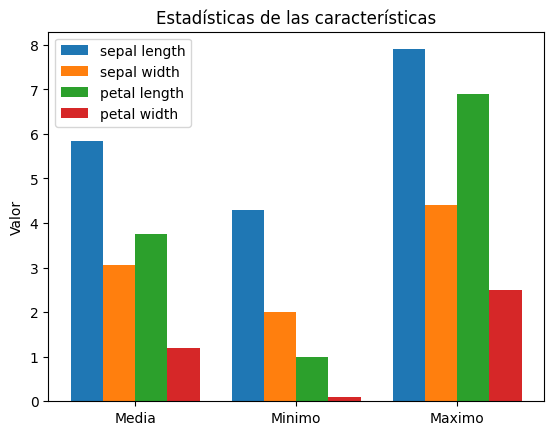

In [171]:
import matplotlib.pyplot as plt

etiquetas = ['Media', 'Minimo', 'Maximo']

#[mean, min, max] = estadisticas['sepal length'].loc[['mean', 'min', 'max']]

#print(mean, min, max)
#print(type(estadisticas))
#print(estadisticas.columns.values)

data = {}

for col in estadisticas.columns.values:
  data[col] = estadisticas[col].loc[['mean', 'min', 'max']]
  
#print(data)

# creamos un gráfico de barras para cada columna en data
fig, ax = plt.subplots()

for idx, (col, valores) in enumerate(data.items()):
  separacion = [i + idx*0.2 for i in range(len(valores))]
  ax.bar(separacion, valores, width=0.2, label=col)


# Configuración de las etiquetas y título
ax.set_xticks([i + 0.2*(len(data)-1)/2 for i in range(len(etiquetas))])
ax.set_xticklabels(etiquetas)
ax.set_ylabel('Valor')
ax.set_title('Estadísticas de las características')
ax.legend()

plt.show()


## Ejercicio 10
Muestre la frecuencia de las tres especies como una gráfica de pastel.

Especie
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


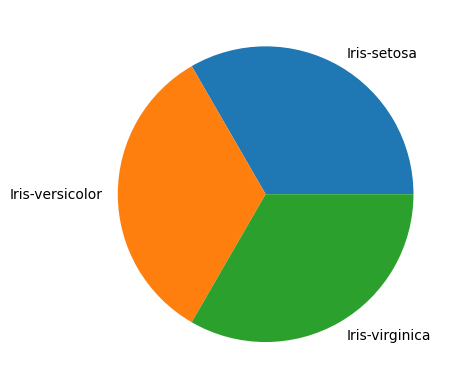

In [172]:
print(frecuencia_por_especie)
etiquetas = frecuencia_por_especie.index
valores = frecuencia_por_especie.values

plt.pie(valores, labels=etiquetas)
plt.show()

## Ejercicio 11
Cree una gráfica que muestre la relación entre la longitud y ancho del sépalo de las tres especies
conjuntamente.

In [173]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


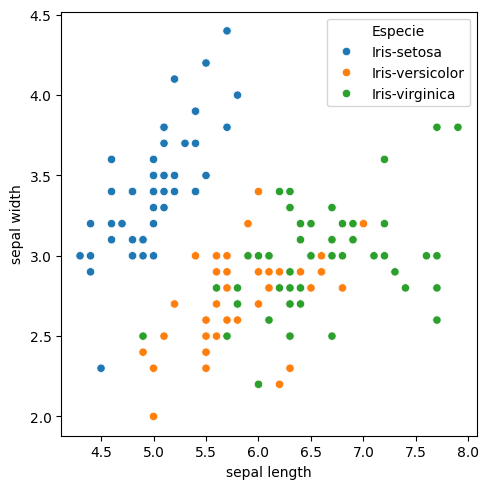

In [174]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(data=x, x="sepal length", y="sepal width", ax=ax, hue="Especie")
plt.tight_layout()